In [133]:
#null value check
#data analysis
#count check for class imbalance
#feature selection rfe
#handling class imbalance
#dataset split
#minmax scaling
#ae
#classifier

## Data preparation

In [134]:
import tensorflow as tf

In [135]:
tf

<module 'tensorflow' from 'C:\\Users\\acer\\anaconda3\\lib\\site-packages\\tensorflow\\__init__.py'>

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [137]:
df = pd.read_csv(r'C:\Users\acer\Desktop\Aristocrat\framingham.csv')

In [138]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [139]:
import numpy as np

In [140]:
#rfe

In [141]:
df.shape

(4240, 16)

In [142]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [143]:
df.fillna(method = 'ffill' , inplace = True)

In [144]:
X = df.drop('TenYearCHD',axis = 1)

In [145]:
y = pd.DataFrame(df['TenYearCHD'])

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4235,0
4236,0
4237,0
4238,0


## Feature Selection

In [148]:

from sklearn.preprocessing import MinMaxScaler
#

In [149]:
from sklearn.feature_selection import RFE

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
y.shape

(4240, 1)

In [152]:
import numpy as np

In [153]:
# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
# fit the model
rfe.fit_transform(X,y)



array([[ 39.  , 195.  , 106.  , ...,  26.97,  80.  ,  77.  ],
       [ 46.  , 250.  , 121.  , ...,  28.73,  95.  ,  76.  ],
       [ 48.  , 245.  , 127.5 , ...,  25.34,  75.  ,  70.  ],
       ...,
       [ 52.  , 269.  , 133.5 , ...,  21.47,  80.  , 107.  ],
       [ 40.  , 185.  , 141.  , ...,  25.6 ,  67.  ,  72.  ],
       [ 39.  , 196.  , 133.  , ...,  20.91,  85.  ,  80.  ]])

In [154]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [155]:
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 3.000
Column: 3, Selected False, Rank: 6.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected False, Rank: 7.000
Column: 6, Selected False, Rank: 9.000
Column: 7, Selected False, Rank: 5.000
Column: 8, Selected False, Rank: 8.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000


In [156]:
df2 = df.drop(['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','education'],axis = 1)

In [157]:
df2

,male,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...
4235,0,48,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,15.0,210.0,126.5,87.0,19.16,86.0,86.0,0
4237,0,52,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


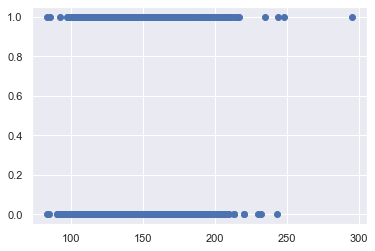

In [158]:
plt.scatter(df2['sysBP'],df2['TenYearCHD'])

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

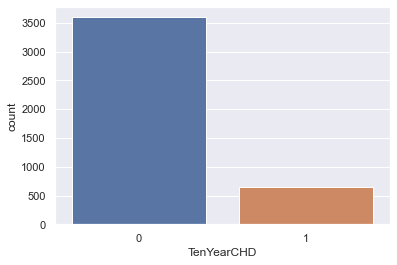

In [160]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x = "TenYearCHD",data = df2)

## AutoEncoder Phase

In [161]:
import keras
from keras import layers


In [162]:
from tensorflow.keras import regularizers

In [163]:
from keras.models import Sequential
from keras.layers import Dense

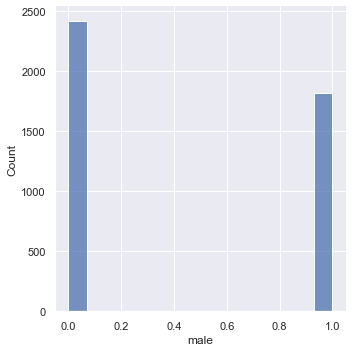

<Figure size 432x288 with 0 Axes>

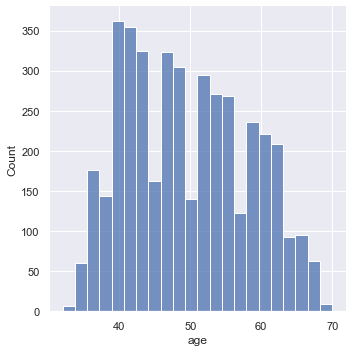

<Figure size 432x288 with 0 Axes>

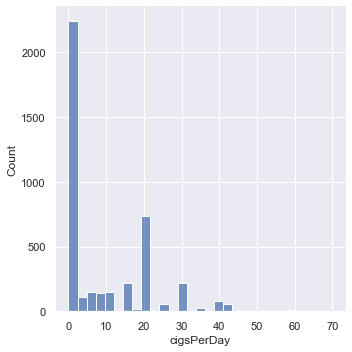

<Figure size 432x288 with 0 Axes>

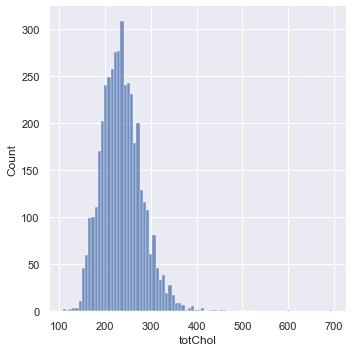

<Figure size 432x288 with 0 Axes>

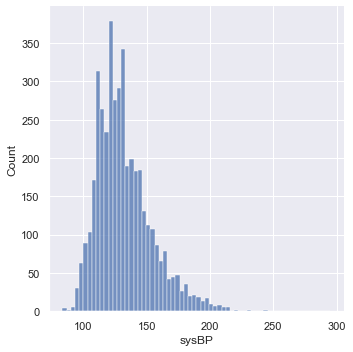

<Figure size 432x288 with 0 Axes>

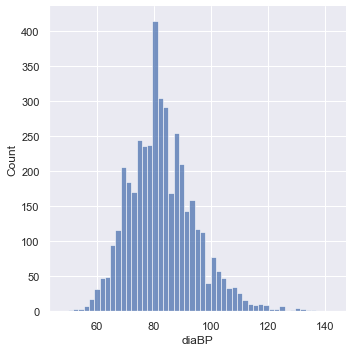

<Figure size 432x288 with 0 Axes>

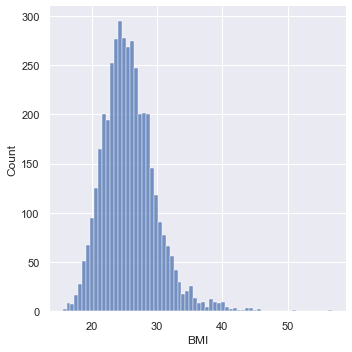

<Figure size 432x288 with 0 Axes>

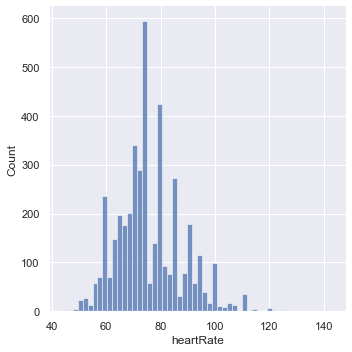

<Figure size 432x288 with 0 Axes>

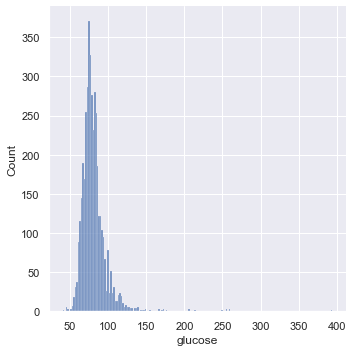

<Figure size 432x288 with 0 Axes>

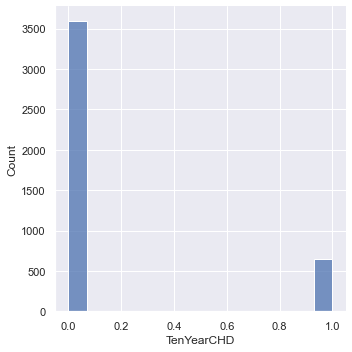

<Figure size 432x288 with 0 Axes>

In [164]:
%matplotlib inline
for column in df2.columns:
    sns.displot(df2[column],height = 5)
    plt.figure()
    

In [165]:
df4

,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,195.0,106.0,70.0,26.97,80.0,77.0
1,250.0,121.0,81.0,28.73,95.0,76.0
2,245.0,127.5,80.0,25.34,75.0,70.0
3,225.0,150.0,95.0,28.58,65.0,103.0
4,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...
4235,248.0,131.0,72.0,22.00,84.0,86.0
4236,210.0,126.5,87.0,19.16,86.0,86.0
4237,269.0,133.5,83.0,21.47,80.0,107.0
4238,185.0,141.0,98.0,25.60,67.0,72.0


In [166]:
df2.head(1)

,male,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0


In [167]:
df3 = df2.drop(['cigsPerDay','male','age','TenYearCHD'],axis = 1)

In [168]:
lowerLimit = df3.quantile(0.001)
upperLimit = df3.quantile(0.995)

In [169]:
upperLimit

totChol      372.80500
sysBP        208.80500
diaBP        124.00000
BMI           40.48465
heartRate    112.00000
glucose      253.22000
Name: 0.995, dtype: float64

In [170]:
df3.shape

(4240, 6)

In [171]:
df4 = df3[(df3>lowerLimit) & (df3<upperLimit)].dropna()

In [172]:
df4

,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,195.0,106.0,70.0,26.97,80.0,77.0
1,250.0,121.0,81.0,28.73,95.0,76.0
2,245.0,127.5,80.0,25.34,75.0,70.0
3,225.0,150.0,95.0,28.58,65.0,103.0
4,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...
4235,248.0,131.0,72.0,22.00,84.0,86.0
4236,210.0,126.5,87.0,19.16,86.0,86.0
4237,269.0,133.5,83.0,21.47,80.0,107.0
4238,185.0,141.0,98.0,25.60,67.0,72.0


In [173]:
df4 = df4[(df4['glucose']<140) & (df4['BMI']<38) & (df4['sysBP']<190)].dropna()

In [174]:
print(skew(df4['sysBP']))

0.6879044617608389


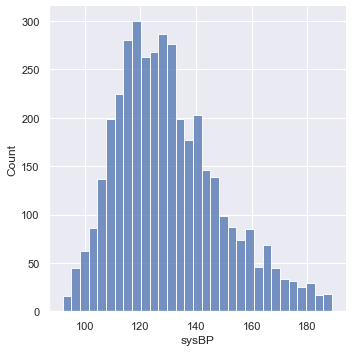

In [175]:
sns.displot(df4['sysBP'])

In [176]:
#Ive transformed df4 by using powerTransformer which is 'a'

In [177]:
from scipy.stats import skew

print(skew(a[:,1]))

0.021883067869700543


In [178]:
print(skew(df4['sysBP']))

0.6879044617608389


In [179]:
from sklearn.preprocessing import PowerTransformer

In [180]:
df4

,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,195.0,106.0,70.0,26.97,80.0,77.0
1,250.0,121.0,81.0,28.73,95.0,76.0
2,245.0,127.5,80.0,25.34,75.0,70.0
3,225.0,150.0,95.0,28.58,65.0,103.0
4,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...
4235,248.0,131.0,72.0,22.00,84.0,86.0
4236,210.0,126.5,87.0,19.16,86.0,86.0
4237,269.0,133.5,83.0,21.47,80.0,107.0
4238,185.0,141.0,98.0,25.60,67.0,72.0


In [181]:
pt = PowerTransformer()
a = pt.fit_transform(df4)

In [182]:
a

array([[-0.97126492, -1.47646297, -1.15038616,  0.45705232,  0.47927307,
        -0.08046649],
       [ 0.4109513 , -0.40238095, -0.03195244,  0.90478962,  1.60993134,
        -0.16694178],
       [ 0.29578869, -0.01427237, -0.12647764,  0.01462536,  0.05045271,
        -0.72887948],
       ...,
       [ 0.83270975,  0.31092827,  0.15328459, -1.16533847,  0.47927307,
         1.86117449],
       [-1.2547709 ,  0.67906221,  1.40213934,  0.08712971, -0.70446172,
        -0.53285538],
       [-0.9435466 ,  0.28493217,  0.42207688, -1.3539603 ,  0.88000409,
         0.16802421]])

In [183]:
df4.shape

(3965, 6)

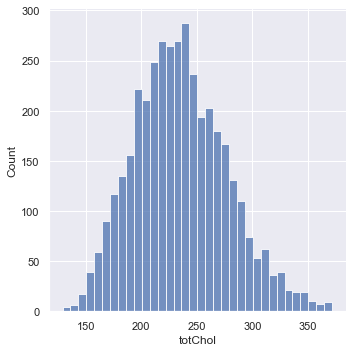

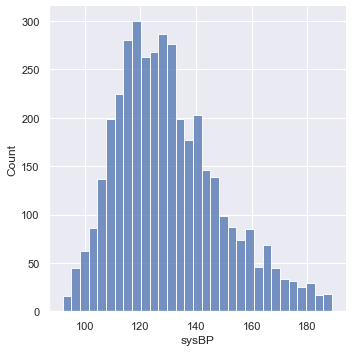

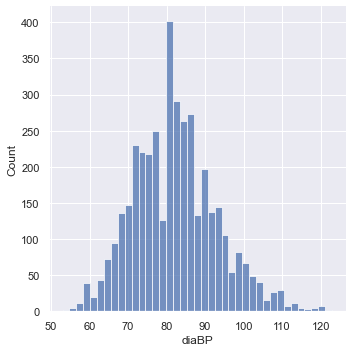

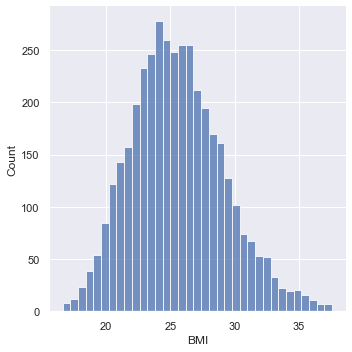

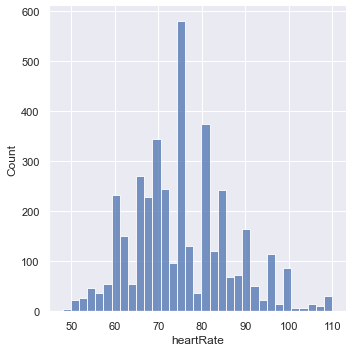

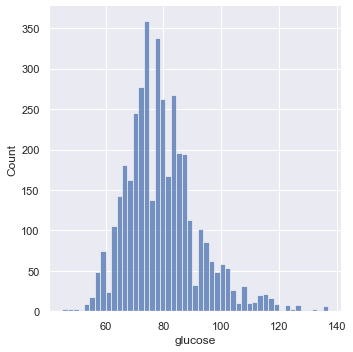

In [184]:
for i in df4.columns:
    sns.displot(df4[i])

In [185]:
df4[['cigsPerDay','male','age','TenYearCHD']] = df2[['cigsPerDay','male','age','TenYearCHD']]

In [186]:
df4

,totChol,sysBP,diaBP,BMI,heartRate,glucose,cigsPerDay,male,age,TenYearCHD
0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,1,39,0
1,250.0,121.0,81.0,28.73,95.0,76.0,0.0,0,46,0
2,245.0,127.5,80.0,25.34,75.0,70.0,20.0,1,48,0
3,225.0,150.0,95.0,28.58,65.0,103.0,30.0,0,61,1
4,285.0,130.0,84.0,23.10,85.0,85.0,23.0,0,46,0
...,...,...,...,...,...,...,...,...,...,...
4235,248.0,131.0,72.0,22.00,84.0,86.0,20.0,0,48,0
4236,210.0,126.5,87.0,19.16,86.0,86.0,15.0,0,44,0
4237,269.0,133.5,83.0,21.47,80.0,107.0,0.0,0,52,0
4238,185.0,141.0,98.0,25.60,67.0,72.0,0.0,1,40,0


In [187]:
#sns.displot(X_train['age'])

In [ ]:
X

In [188]:
from keras import layers

In [189]:
scaler = MinMaxScaler()

In [190]:
scaler.fit(df4)

MinMaxScaler()

In [191]:
norm_array = scaler.transform(df4)

In [192]:
norm_df = pd.DataFrame(norm_array,columns = df4.columns)

In [193]:
norm_df

,totChol,sysBP,diaBP,BMI,heartRate,glucose,cigsPerDay,male,age,TenYearCHD
0,0.271605,0.144330,0.242857,0.494039,0.516129,0.347826,0.000000,1.0,0.184211,0.0
1,0.497942,0.298969,0.400000,0.577969,0.758065,0.336957,0.000000,0.0,0.368421,0.0
2,0.477366,0.365979,0.385714,0.416309,0.435484,0.271739,0.285714,1.0,0.421053,0.0
3,0.395062,0.597938,0.600000,0.570815,0.274194,0.630435,0.428571,0.0,0.763158,1.0
4,0.641975,0.391753,0.442857,0.309490,0.596774,0.434783,0.328571,0.0,0.368421,0.0
...,...,...,...,...,...,...,...,...,...,...
3960,0.489712,0.402062,0.271429,0.257034,0.580645,0.445652,0.285714,0.0,0.421053,0.0
3961,0.333333,0.355670,0.485714,0.121602,0.612903,0.445652,0.214286,0.0,0.315789,0.0
3962,0.576132,0.427835,0.428571,0.231760,0.516129,0.673913,0.000000,0.0,0.526316,0.0
3963,0.230453,0.505155,0.642857,0.428708,0.306452,0.293478,0.000000,1.0,0.210526,0.0


In [194]:
xtrain,xtest,ytrain,ytest = train_test_split(norm_df.drop('TenYearCHD',axis = 1),norm_df['TenYearCHD'])

In [195]:
X2 = norm_df.drop('TenYearCHD',axis = 1)

In [196]:
y2 = pd.DataFrame(norm_df['TenYearCHD'])

In [197]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X2, y2)

In [198]:
X_res

,totChol,sysBP,diaBP,BMI,heartRate,glucose,cigsPerDay,male,age
0,0.271605,0.144330,0.242857,0.494039,0.516129,0.347826,0.000000,1.0,0.184211
1,0.497942,0.298969,0.400000,0.577969,0.758065,0.336957,0.000000,0.0,0.368421
2,0.477366,0.365979,0.385714,0.416309,0.435484,0.271739,0.285714,1.0,0.421053
3,0.395062,0.597938,0.600000,0.570815,0.274194,0.630435,0.428571,0.0,0.763158
4,0.641975,0.391753,0.442857,0.309490,0.596774,0.434783,0.328571,0.0,0.368421
...,...,...,...,...,...,...,...,...,...
6823,0.487339,0.560828,0.500000,0.545199,0.435484,0.317519,0.315964,1.0,0.452941
6824,0.607704,0.440304,0.324422,0.589385,0.547048,0.324734,0.285714,1.0,0.449552
6825,0.506664,0.563608,0.529537,0.349863,0.446418,0.255899,0.235104,1.0,0.324265
6826,0.434195,0.385982,0.349685,0.213971,0.440049,0.841742,0.197754,0.0,0.406323


In [199]:
X_res.describe()

,totChol,sysBP,diaBP,BMI,heartRate,glucose,cigsPerDay,male,age
count,6828.000000,6828.000000,6828.000000,6828.000000,6828.000000,6828.000000,6828.000000,6828.000000,6828.000000
mean,0.449557,0.430393,0.436454,0.435383,0.441448,0.379553,0.139538,0.488869,0.504827
std,0.164251,0.199779,0.157231,0.166213,0.178823,0.135137,0.174017,0.499913,0.221215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.282659,0.324613,0.316643,0.318172,0.293478,0.000000,0.000000,0.315789
50%,0.441101,0.399300,0.422668,0.428771,0.435484,0.358696,0.036677,0.000000,0.500000
75%,0.555556,0.560844,0.530165,0.547449,0.544093,0.442859,0.285714,1.000000,0.684211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
import seaborn as sns

<Figure size 864x864 with 0 Axes>

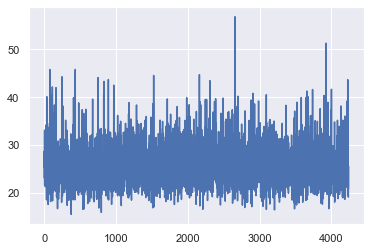

<Figure size 864x864 with 0 Axes>

In [201]:
%matplotlib inline
plt.plot(df['BMI'])
plt.figure(figsize = (12,12))

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

In [203]:
y_train.shape

(4779, 1)

In [208]:
X_train.shape

(5462, 9)

In [ ]:
keras.Flatten()

In [214]:
autoencoder = Sequential()
autoencoder.add(Dense(500,input_shape = (5462,9))) #input layer
autoencoder.add(Dense(250,  activation='tanh',kernel_regularizer = regularizers.l1(0.1)))#encoder
#autoencoder.add(Dense(18,  activation='relu',kernel_regularizer = regularizers.l1(0.1)))#encoder
autoencoder.add(Dense(9,  activation='relu', name="bottleneck"))#central
autoencoder.add(Dense(18,  activation='tanh'))#decoder
autoencoder.add(Dense(36,  activation='tanh'))#decoder
autoencoder.add(Dense(9,  activation='relu'))#output

In [215]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mean_squared_error',metrics = ['accuracy'])

In [209]:
5462*9


49158

In [216]:
autoencoder.fit(X_train,X_train,batch_size=40,epochs=50)

Epoch 1/50


ValueError: in user code:

    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 5462, 9), found shape=(None, 9)


In [67]:
X3 = autoencoder.predict(X_train)

150/150 [==============================] - 0s 747us/step


In [68]:
classifier = Sequential()
classifier.add(Dense(18,input_dim = 9,activation = 'relu')) #input layer
classifier.add(Dense(9,  activation='tanh'))#hidden
classifier.add(Dense(3,  activation='relu'))#hidden
classifier.add(Dense(1,  activation='sigmoid'))#output


In [69]:
classifier.compile(optimizer = 'adadelta',loss = '',metrics = ['accuracy'])

In [186]:
classifier.fit(X3,y_train,batch_size=20,epochs=100)

NameError: name 'classifier' is not defined

In [ ]:
_,acc = autoencoder.evaluate(xtest,ytest)